<AxesSubplot:xlabel='expected_hours', ylabel='price'>

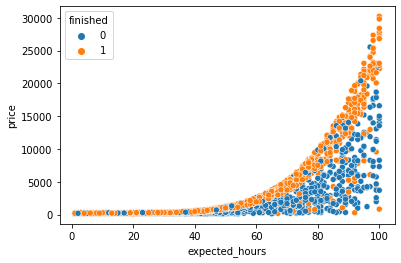

In [7]:
import pandas as pd
import seaborn as sns

url = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
data = pd.read_csv(url)

change_unfinished_to_finished = {
    1: 0,
    0: 1
}

data['finished'] = data.unfinished.map(change_unfinished_to_finished)

x = data[['expected_hours', 'price']]
y = data['finished']

sns.scatterplot(x='expected_hours', y='price', hue='finished', data=data)

In [8]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 20

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=SEED)

print('Training with %d items & testing with %d items' % (len(x_train), len(x_test)))

model = LinearSVC(dual=False)
model.fit(x_train, np.ravel(y_train))
predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions) * 100

print('Accuracy is %.2f%%' % accuracy)

Training with 1617 items & testing with 540 items
Accuracy is 54.44%


<AxesSubplot:xlabel='expected_hours', ylabel='price'>

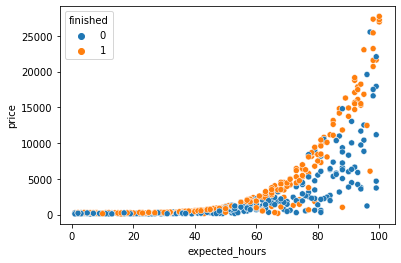

In [9]:
sns.scatterplot(x="expected_hours", y="price", hue=y_test, data=x_test)

In [10]:
x_min = x_test.expected_hours.min()
x_max = x_test.expected_hours.max()
y_min = x_test.price.min()
y_max = x_test.price.max()

pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]

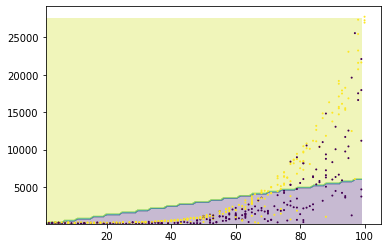

In [11]:
import matplotlib.pyplot as plt

Z = model.predict(points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_test.expected_hours, x_test.price, c=y_test, s=1)